<a href="https://colab.research.google.com/github/akimotolab/CMAES_Tutorial/blob/main/0_black_box_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ブラックボックス最適化とは

ブラックボックス最適化 (Black-Box Optimization, BBO) とは，入力 (i.e., 解，設計変数) $x$ の良さを表す指標 (i.e., 目的関数値，コスト) $f(x)$ がブラックボックスであるような場合に，$f(x)$を最適化する$x$を求める問題を表します．

ここでは，ブラックボックス最適化を実際に解いてみることで，ブラックボックス最適化というものを理解していきましょう．

## 自分でBBO問題を解いてみる

まずは自分の手でBBO問題を解いてみましょう．
以下のコードを見ないで実行し，すぐに非表示にしましょう．

### 問題定義　（実行後非表示）

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class BBO:
    def __init__(self):
        self._hist = np.empty((0, 3))
    def __call__(self, x, y):
        gx = self.g(x, y)
        fx = self.f(x, y)
        if gx > 0:
            return np.inf
        else:
            self._hist = np.vstack((self._hist, np.array([x, y, fx])))
            return fx
    def plot(self):
        fig = plt.figure()
        plt.scatter(x=self._hist[:, 0], y=self._hist[:, 1], c=self._hist[:, 2], cmap='Blues', edgecolors='blue')
        plt.colorbar()
        fig.gca().set_aspect('equal')
        plt.ylim((0, 1))
        plt.xlim((0, 1))
        plt.xlabel('x')
        plt.ylabel('y')
    def g(self, x, y):
        return max(np.abs(x - 0.5) - 0.5, np.abs(y - 0.5) - 0.5)
    def f(self, x, y):
        a = 2.0
        scale = 3.0
        offset_x = 0.2
        offset_y = - 0.1
        xx = 10 * (x - offset_x) - 5
        yy = 10 * (y - offset_y) - 5
        xxx = (xx + np.sqrt(3) * yy) / 2
        yyy = scale * (np.sqrt(3) * xx - yy) / 2
        return xxx**2 + a * (1.0 - np.cos(2 * np.pi * xxx)) + yyy**2 + a * (1.0 - np.cos(2 * np.pi * yyy))
    def contourf(self):
        delta = 0.01
        x = y = np.arange(0.0, 1.0, delta)
        X, Y = np.meshgrid(x, y)
        Z = self.f(X, Y)
        fig = plt.figure()
        plt.contourf(X, Y, Z, 100, cmap='rainbow')
        plt.colorbar()
        fig.gca().set_aspect('equal')
        plt.ylim((0, 1))
        plt.xlim((0, 1))
        plt.xlabel('x')
        plt.ylabel('y')
    def get_hist(self):
        return np.array(self._hist, copy=True)

### 実行スクリプト
ここで考える問題は2変数の最適化問題です．

`bbo(x, y)`：$f(x, y)$の評価．
各変数は$[0, 1]$の範囲の値を取ります．
それ以外の値を入力した場合，実行不能と判断され，目的関数値は$\infty$となります．

`bbo.plot()`：これまでに評価した実行可能解の散布図を表示します．

`bbo.get_hist()`：これまでに評価した実行可能解の2D配列を返します．各行が[$x$, $y$, $f(x, y)$]


In [10]:
bbo = BBO()

以下の$x, y$を変えながら，最適解を予想していきましょう．
まず，定義域の中心を評価してみます．

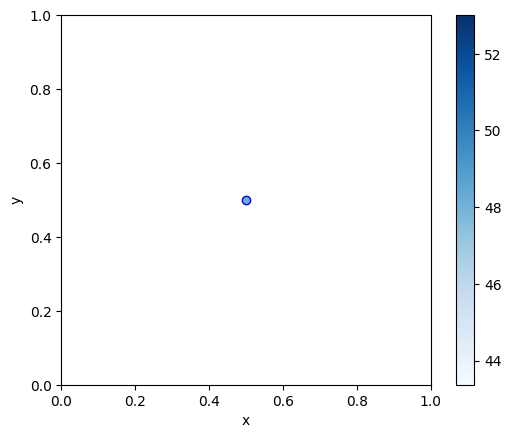

In [11]:
bbo(0.5, 0.5)
bbo.plot()

境界付近のいくつかの点を評価してみます．

[[5.00000000e-01 5.00000000e-01 4.81879772e+01]
 [1.00000000e-01 1.00000000e-01 1.58225503e+02]
 [1.00000000e-01 9.00000000e-01 5.38112038e+02]
 [9.00000000e-01 1.00000000e-01 1.02865177e+02]
 [9.00000000e-01 9.00000000e-01 3.93467060e+01]]


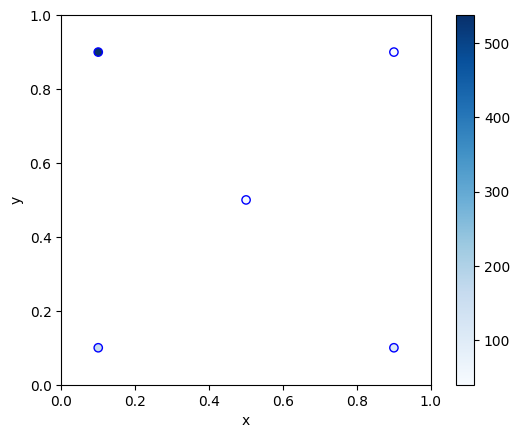

In [12]:
bbo(0.1, 0.1)
bbo(0.1, 0.9)
bbo(0.9, 0.1)
bbo(0.9, 0.9)
bbo.plot()
print(bbo.get_hist())

あとは自分で予想して，評価をくりかえして行きましょう．

In [61]:
bbo(0.1, 0.1)
bbo.plot()

さて，この問題の最適解は$(0.7, 0.4)$であり，$f(0.7, 0.4) = 0$でした．
等高線は以下のようになります．

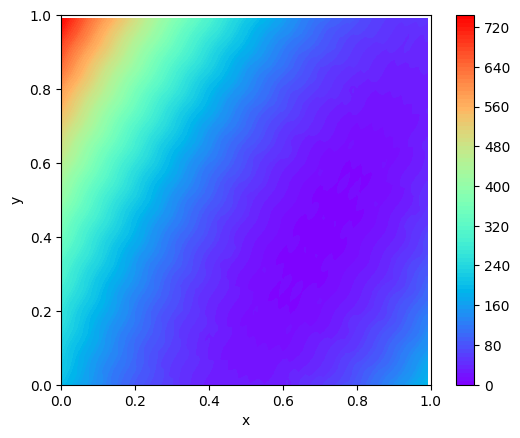

In [14]:
bbo.contourf()

## 網羅的に探索してみる

このような問題を解く一つのアプローチとして，網羅的に目的関数値を評価してみる，という方針が思い浮かぶでしょう．
これを実際にやってみましょう．

ここでは，各次元について，$[0, 1]$を境界を含んで$K$個の点で分割し，合計$K^2$個のグリッド上の格子点について，解を評価してみます．

In [18]:
bbo = BBO()
K = 20
x_array = np.linspace(0, 1, num=K)
y_array = np.linspace(0, 1, num=K)
for x in x_array:
    for y in y_array:
        bbo(x, y)

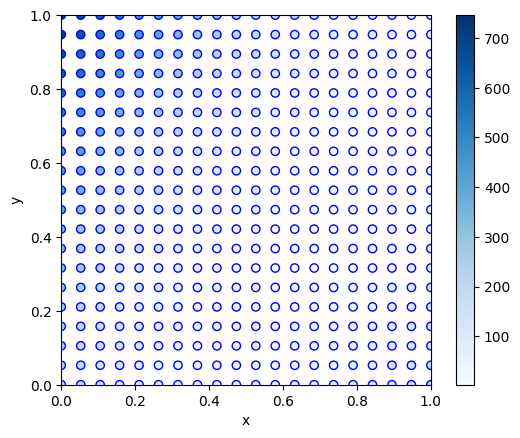

In [19]:
bbo.plot()

In [20]:
min(bbo.get_hist()[:, 2])

2.6251182450156145